In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('practica2').getOrCreate()

df = spark.read.csv(
	"./analisis.csv",
	header=True,
	inferSchema=True
)

df.show()

+---------------+---------+---------+---------+---------+---------+---------+---------+
|        usuario|       op|       co|       ex|       ag|       ne|wordcount|categoria|
+---------------+---------+---------+---------+---------+---------+---------+---------+
|   3gerardpique|34.297953|28.148819|41.948819|29.370315| 9.841575|  37.0945|        7|
|aguerosergiokun|44.986842|20.525865|37.938947|24.279098|10.362406|   78.797|        7|
| albertochicote|41.733854|13.745417|38.999896|34.645521| 8.836979|  49.2604|        4|
|  AlejandroSanz|40.377154|15.377462|52.337538|31.082154| 5.032231|  80.4538|        2|
| alfredocasero1|36.664677|19.642258|48.530806|31.138871| 7.305968|  47.0645|        4|
|    alo_oficial|33.531771|16.183958|43.211667|25.786667|11.930417|  40.1354|        7|
| andresiniesta8|31.851102|13.735591|47.182362|19.594331| 6.905591|  91.5197|        7|
| andykusnetzoff|31.865118| 16.58811|55.377559|36.258346| 7.464646|  66.2835|        5|
|    andyroddick|46.393488|25.45

In [3]:
df.printSchema()

root
 |-- usuario: string (nullable = true)
 |-- op: double (nullable = true)
 |-- co: double (nullable = true)
 |-- ex: double (nullable = true)
 |-- ag: double (nullable = true)
 |-- ne: double (nullable = true)
 |-- wordcount: double (nullable = true)
 |-- categoria: integer (nullable = true)



In [4]:
from pyspark.ml.feature import VectorAssembler

input_cols = ['op','co','ex','ag','ne','wordcount']
vect_assembler = VectorAssembler(
	inputCols= input_cols,
	outputCol= "features"
)

final_data = vect_assembler.transform(df)

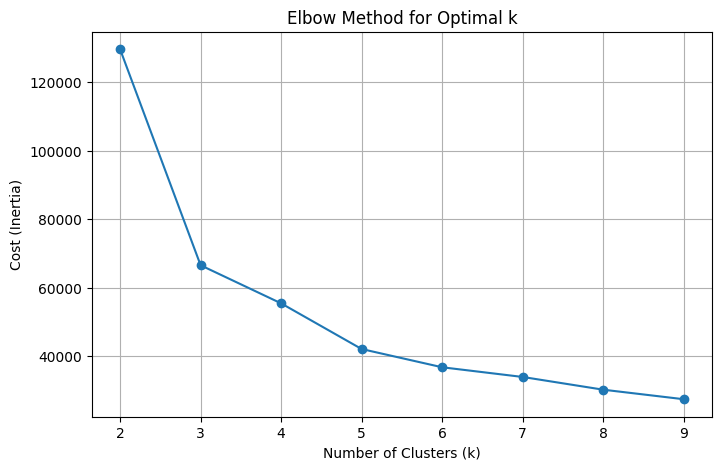

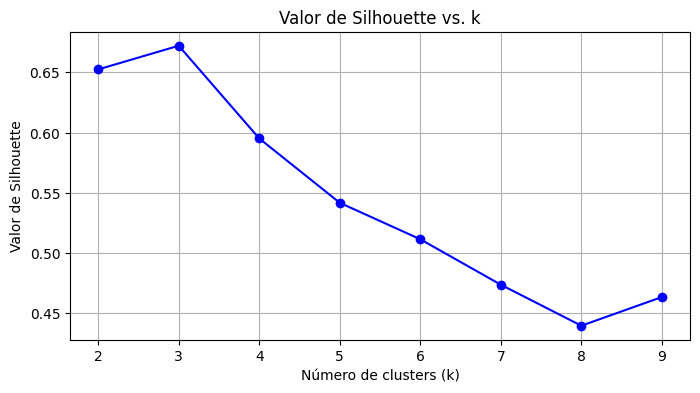

In [34]:
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

costs = []
sse = []
K = 10
for k in range(2, K):
	kmeans = KMeans().setK(k).setSeed(1)
	model = kmeans.fit(final_data)
	cost = model.summary.trainingCost
	costs.append(cost)

    # Calcular SSE
	predictions = model.transform(final_data)
	evaluator = ClusteringEvaluator()
	silhouette = evaluator.evaluate(predictions)
	sse.append(silhouette)


plt.figure(figsize=(8, 5))
plt.plot(range(2, K), costs, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(2, K), sse, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Valor de Silhouette')
plt.title('Valor de Silhouette vs. k')
plt.grid(True)
plt.show()

In [35]:
k = 3

kmeans = KMeans(featuresCol="features", k=k)
model = kmeans.fit(final_data)
centers = model.clusterCenters()
predictions = model.transform(final_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


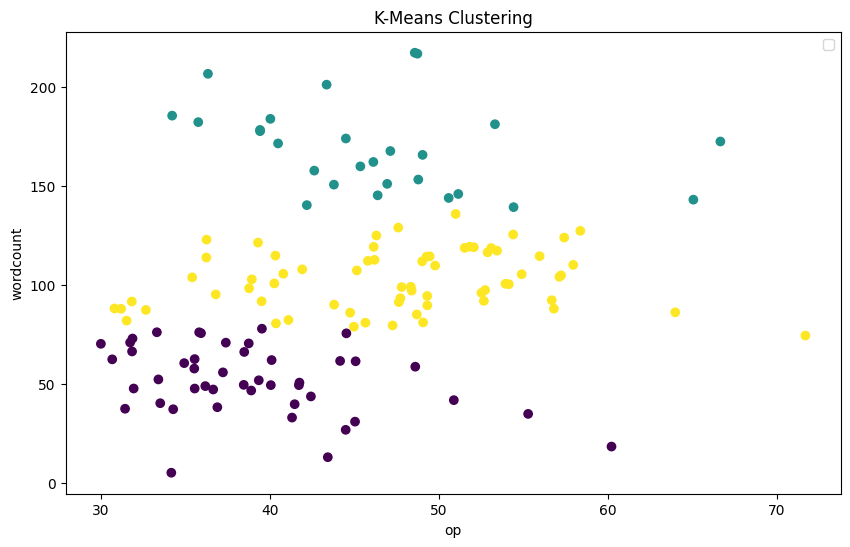

In [36]:
from pyspark.sql import functions as f

cluster_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))

x_values = predictions.select(f.col('op')).rdd.flatMap(lambda x: x).collect()
y_values = predictions.select(f.col('wordcount')).rdd.flatMap(lambda x: x).collect()

plt.scatter(x_values, y_values, c=cluster_labels, cmap='viridis')

plt.title('K-Means Clustering')
plt.xlabel('op')
plt.ylabel('wordcount')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


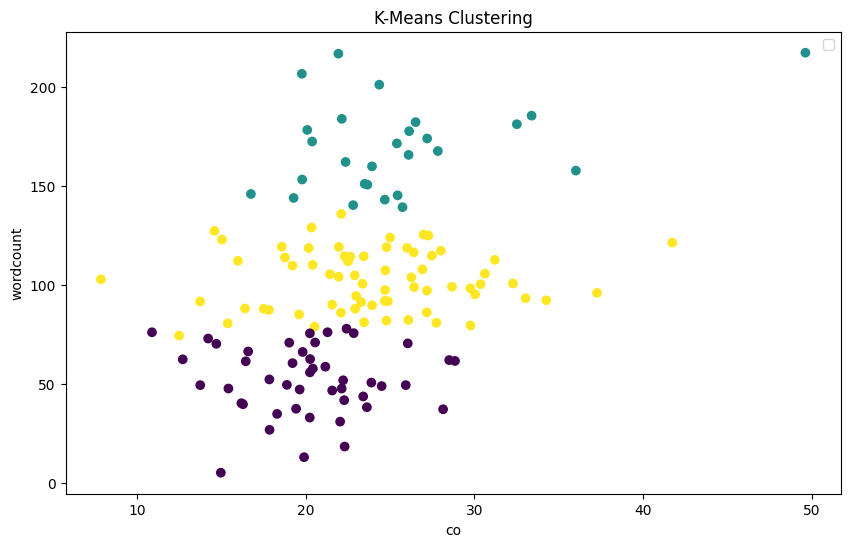

In [37]:
from pyspark.sql import functions as f

cluster_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))

x_values = predictions.select(f.col('co')).rdd.flatMap(lambda x: x).collect()
y_values = predictions.select(f.col('wordcount')).rdd.flatMap(lambda x: x).collect()

plt.scatter(x_values, y_values, c=cluster_labels, cmap='viridis')

plt.title('K-Means Clustering')
plt.xlabel('co')
plt.ylabel('wordcount')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


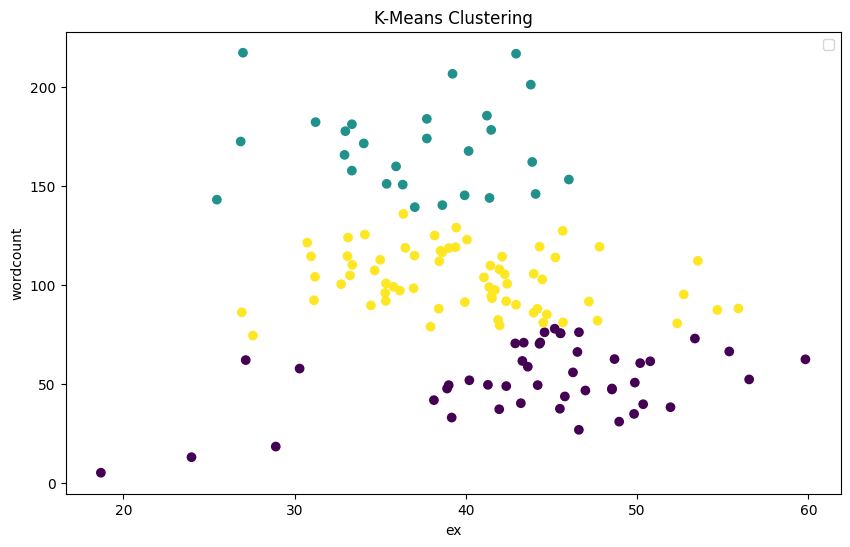

In [38]:
from pyspark.sql import functions as f

cluster_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))

x_values = predictions.select(f.col('ex')).rdd.flatMap(lambda x: x).collect()
y_values = predictions.select(f.col('wordcount')).rdd.flatMap(lambda x: x).collect()

plt.scatter(x_values, y_values, c=cluster_labels, cmap='viridis')

cluster_centers = model.clusterCenters()

plt.title('K-Means Clustering')
plt.xlabel('ex')
plt.ylabel('wordcount')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


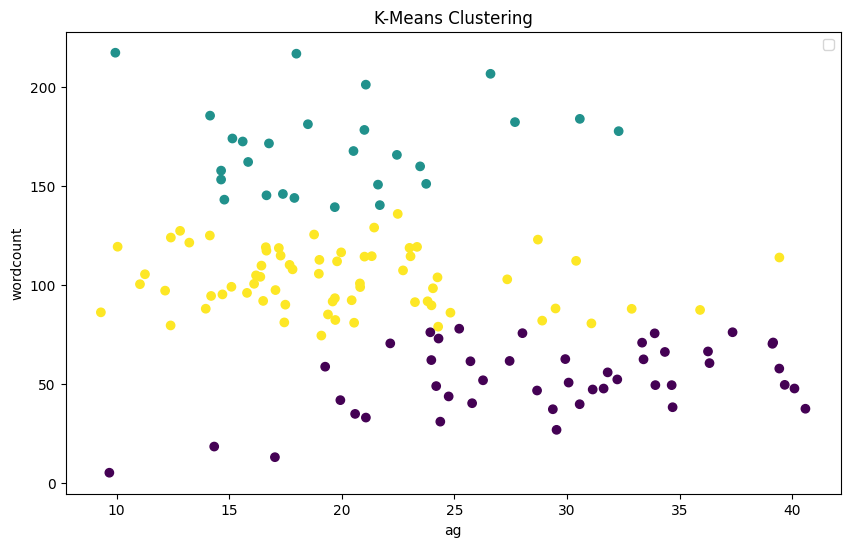

In [39]:
from pyspark.sql import functions as f

cluster_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))

x_values = predictions.select(f.col('ag')).rdd.flatMap(lambda x: x).collect()
y_values = predictions.select(f.col('wordcount')).rdd.flatMap(lambda x: x).collect()

plt.scatter(x_values, y_values, c=cluster_labels, cmap='viridis')


plt.title('K-Means Clustering')
plt.xlabel('ag')
plt.ylabel('wordcount')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


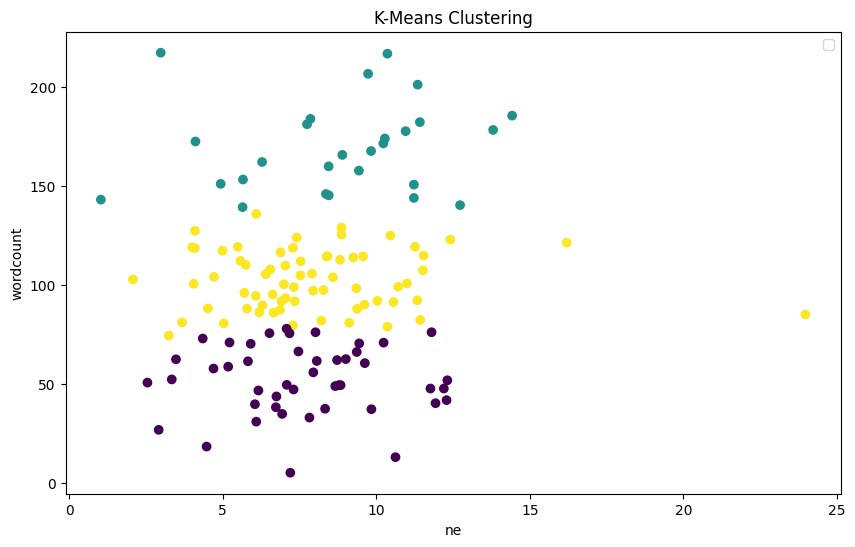

In [40]:
from pyspark.sql import functions as f

cluster_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))

x_values = predictions.select(f.col('ne')).rdd.flatMap(lambda x: x).collect()
y_values = predictions.select(f.col('wordcount')).rdd.flatMap(lambda x: x).collect()

plt.scatter(x_values, y_values, c=cluster_labels, cmap='viridis')

plt.title('K-Means Clustering')
plt.xlabel('ne')
plt.ylabel('wordcount')
plt.legend()
plt.show()